In [2]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import galsim
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure

In [5]:
lens = SampleStrongLens()
roman = Roman()
band = 'F106'
scene_size = 5  # arcsec
exposure_time = 146
instrument_params = {
    'detector': 1,
    'detector_position': (2048, 2048)
}
engine_params = {
    'sky_background': False,
    'detector_effects': False,
}

synth_1 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=1, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_1 = Exposure(synth_1, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 47x47 (5.17"x5.17") with pixel scale 0.11 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 1)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


ValueError: Negative pixel values in final image

In [6]:
synth_3 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=3, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_3 = Exposure(synth_3, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 141x141 (5.17"x5.17") with pixel scale 0.03666666666666667 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 3)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


In [7]:
synth_5 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=5, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_5 = Exposure(synth_5, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 235x235 (5.17"x5.17") with pixel scale 0.022 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 5)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


In [8]:
synth_7 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=7, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_7 = Exposure(synth_7, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 329x329 (5.17"x5.17") with pixel scale 0.015714285714285715 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 7)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


In [9]:
synth_9 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=9, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_9 = Exposure(synth_9, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 423x423 (5.17"x5.17") with pixel scale 0.012222222222222223 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 9)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


In [10]:
synth_11 = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=11, pieces=False, verbose=True, instrument_params=instrument_params)
exposure_11 = Exposure(synth_11, exposure_time=exposure_time, engine='galsim', engine_params=engine_params, psf=None, verbose=True)

Computing on pixel grid of size 517x517 (5.17"x5.17") with pixel scale 0.01 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 11)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F106 band


In [12]:
dif_9 = exposure_11.exposure - exposure_9.exposure
dif_7 = exposure_11.exposure - exposure_7.exposure
dif_5 = exposure_11.exposure - exposure_5.exposure
dif_3 = exposure_11.exposure - exposure_3.exposure
# dif_1 = exposure_11.exposure - exposure_1.exposure

chi_9 = stats.chi_square(exposure_9.exposure, exposure_11.exposure)
chi_7 = stats.chi_square(exposure_7.exposure, exposure_11.exposure)
chi_5 = stats.chi_square(exposure_5.exposure, exposure_11.exposure)
chi_3 = stats.chi_square(exposure_3.exposure, exposure_11.exposure)
# chi_1 = stats.chi_square(exposure_1.exposure, exposure_11.exposure)

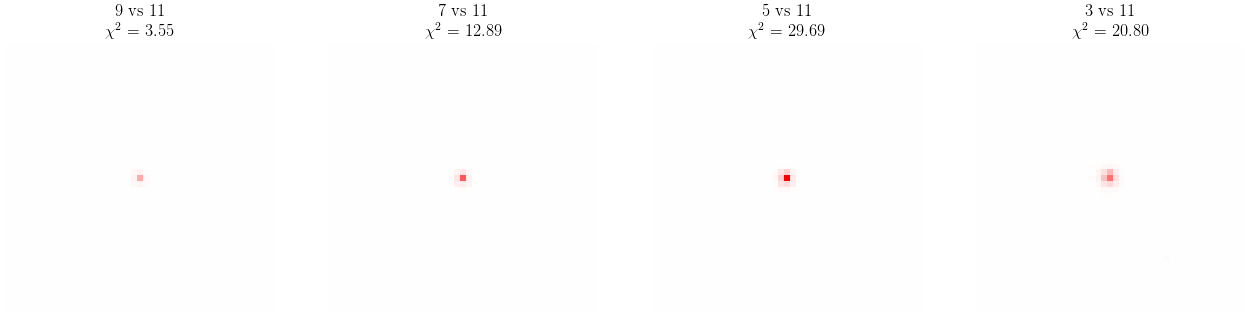

In [14]:
v = plot_util.get_v([dif_3, dif_5, dif_7, dif_9])

f, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(dif_9, vmin=-v, vmax=v, cmap='bwr')
ax[1].imshow(dif_7, vmin=-v, vmax=v, cmap='bwr')
ax[2].imshow(dif_5, vmin=-v, vmax=v, cmap='bwr')
ax[3].imshow(dif_3, vmin=-v, vmax=v, cmap='bwr')

ax[0].set_title(f'9 vs 11\n$\chi^2$ = {chi_9:.2f}')
ax[1].set_title(f'7 vs 11\n$\chi^2$ = {chi_7:.2f}')
ax[2].set_title(f'5 vs 11\n$\chi^2$ = {chi_5:.2f}')
ax[3].set_title(f'3 vs 11\n$\chi^2$ = {chi_3:.2f}')

for a in ax:
    a.axis('off')

plt.show()

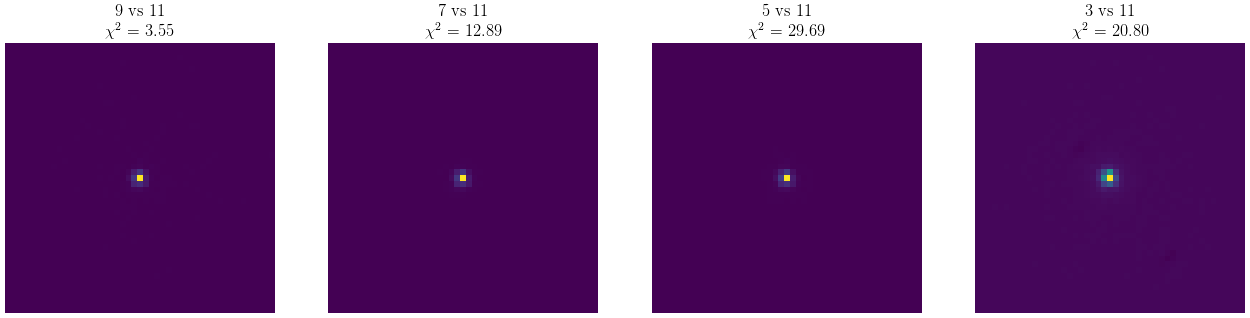

In [15]:
f, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(dif_9)
ax[1].imshow(dif_7)
ax[2].imshow(dif_5)
ax[3].imshow(dif_3)

ax[0].set_title(f'9 vs 11\n$\chi^2$ = {chi_9:.2f}')
ax[1].set_title(f'7 vs 11\n$\chi^2$ = {chi_7:.2f}')
ax[2].set_title(f'5 vs 11\n$\chi^2$ = {chi_5:.2f}')
ax[3].set_title(f'3 vs 11\n$\chi^2$ = {chi_3:.2f}')

for a in ax:
    a.axis('off')

plt.show()

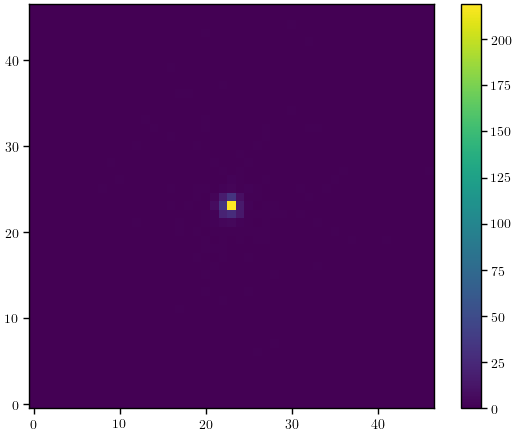

In [16]:
plt.imshow(dif_9)
plt.colorbar()
plt.show()